In [53]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pystan 

In [54]:
sfile = 'rgb_run5_results_summary.txt'
df = pd.read_csv(sfile, sep='\s+')
print(df.head(5))
#df = df.loc[df.m < 1.3]

       kic         m        em         Z        eZ         Y        eY  \
0  2437394  1.341585  0.005751  0.039883  0.002203  0.306156  0.005817   
1  2437957  1.080604  0.009400  0.035478  0.003110  0.300280  0.007108   
2  2436097  1.145564  0.012147  0.040896  0.002504  0.285317  0.004364   
3  2436209  1.224101  0.010675  0.037140  0.002670  0.286390  0.003903   
4  2436332  1.145881  0.009401  0.042008  0.001516  0.286173  0.003986   

            age        eage        A3surf    ...            X        eX  \
0   4751.541656  146.748434  6.168646e-13    ...     0.653961  0.007259   
1  10357.018135  194.027384 -2.189925e-12    ...     0.664242  0.009608   
2  10125.193618  281.172938 -1.077227e-11    ...     0.673787  0.005570   
3   7456.645184  220.045681  2.396669e-12    ...     0.676470  0.005334   
4  10215.725128  252.413017 -2.437027e-11    ...     0.671819  0.004435   

        numax    enumax        Dnu      eDnu          L        eL      Fe_H  \
0  150.751856  0.389975  

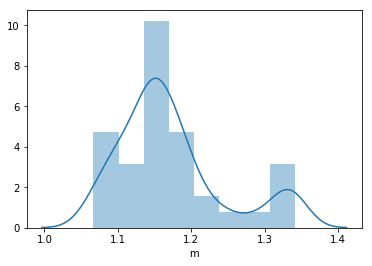

In [55]:
sns.distplot(df.m)

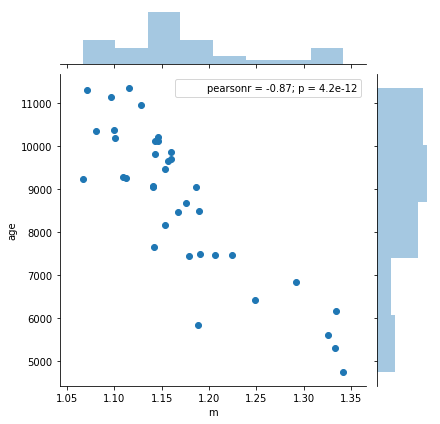

In [56]:
sns.jointplot(df.m, df.age)

In [57]:
model = '''
data {
    int<lower=0> N;
    real M[N];
    real<lower = 0> tau[N];
}
parameters {
    real<lower = 0> mu;
    real<lower = 0> sigma;
    real M_true_std[N];
}
transformed parameters {
    real M_true[N]; // Transform from N(0,1) back to M
    for (i in 1:N)
        M_true[i] = mu + sigma * M_true_std[i];
}
model {
    M_true_std ~ normal(0, 1); // prior but transformed
    M ~ normal(M_true, tau); // Measurement uncertainty
    mu ~ normal(1.15, 0.5);
    sigma ~ normal(0, 0.5);
}
'''
sm = pystan.StanModel(model_code=model, model_name='Model')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL Model_0ad9c158cd352265b8c527bc306ec8b1 NOW.


/home/davies/.local/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


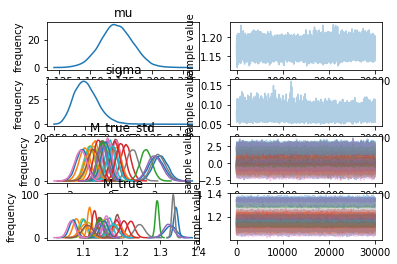

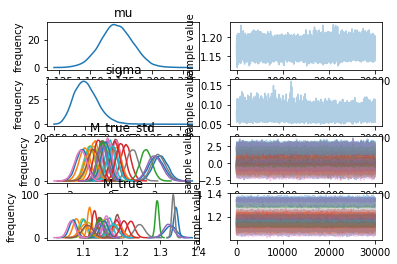

In [58]:
dat = {'N': len(df.m),
      'M': df.m,
      'tau': df.em}
fit = sm.sampling(data=dat, iter=15000, chains=4)
fit.plot()

In [59]:
print(fit)

Inference for Stan model: Model_0ad9c158cd352265b8c527bc306ec8b1.
4 chains, each with iter=15000; warmup=7500; thin=1; 
post-warmup draws per chain=7500, total post-warmup draws=30000.

                 mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu               1.17  3.7e-4   0.01   1.15   1.16   1.17   1.18    1.2   1243    1.0
sigma            0.08  2.0e-4 9.6e-3   0.06   0.07   0.07   0.08    0.1   2429    1.0
M_true_std[0]    2.27  6.9e-3   0.33   1.63   2.04   2.26   2.49   2.92   2283    1.0
M_true_std[1]    -1.2  5.8e-3   0.25  -1.71  -1.37  -1.19  -1.02  -0.72   1923    1.0
M_true_std[2]   -0.34  5.0e-3   0.24  -0.81   -0.5  -0.34  -0.18   0.12   2268    1.0
M_true_std[3]    0.69  4.9e-3   0.23   0.24   0.53   0.69   0.85   1.16   2282    1.0
M_true_std[4]   -0.34  5.0e-3   0.21  -0.76  -0.48  -0.33  -0.19   0.08   1819    1.0
M_true_std[5]    0.23  4.9e-3    0.2  -0.16   0.09   0.23   0.36   0.62   1651    1.0
M_true_std[6]    0.25  4.8e-3   0.21  -0

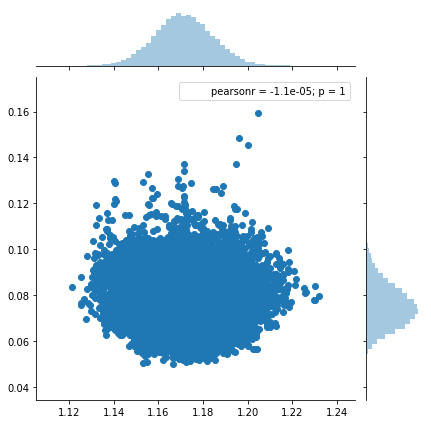

In [60]:
sns.jointplot(fit['mu'], fit['sigma'])